## Importar librerías

In [1]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

## Cargar los datos de NHANES

In [6]:
nhanes_raw_df=nhanes.load.load_NHANES_data(year="2017-2018").clean_names(case_type="snake")
nhanes_raw_df.shape

(8366, 197)

In [12]:
nhanes_raw_df.columns.to_list()

['general_health_condition',
 'ever_breastfed_or_fed_breastmilk',
 'age_stopped_breastfeedingdays',
 'age_first_fed_formuladays',
 'age_stopped_receiving_formuladays',
 'age_started_other_foodbeverage',
 'age_first_fed_milkdays',
 'type_of_milk_first_fed_whole_milk',
 'type_of_milk_first_fed2_milk',
 'type_of_milk_first_fed1_milk',
 'type_of_milk_first_fed_fat_free_milk',
 'type_of_milk_first_fed_soy_milk',
 'type_of_milk_first_fed_other',
 'how_healthy_is_the_diet',
 'past30_day_milk_product_consumption',
 'you_drink_whole_or_regular_milk',
 'you_drink2_fat_milk',
 'you_drink1_fat_milk',
 'you_drink_fat_freeskim_milk',
 'you_drink_soy_milk',
 'you_drink_another_type_of_milk',
 'regular_milk_use5_times_per_week',
 'how_often_drank_milk_age512',
 'how_often_drank_milk_age1317',
 'how_often_drank_milk_age1835',
 'communitygovernment_meals_delivered',
 'eat_meals_at_communitysenior_center',
 'attend_kindergarten_thru_high_school',
 'school_serves_school_lunches',
 'of_timesweek_get_school

## Procesar los datos de NHANES

In [32]:
nhanes_df=nhanes_raw_df.select_columns(
    "general_health_condition",
    "age_in_years_at_screening",
    "gender",
    "current_selfreported_height_inches",
    "current_selfreported_weight_pounds",
    "doctor_told_you_have_diabetes",
    "60_sec_pulse30_sec_pulse2",
    "total_cholesterol_mgdl"
).rename_columns(
    {
        "age_in_years_at_screening":"age",
        "current_selfreported_height_inches":"height",
        "current_selfreported_weight_pounds":"weight",
        "doctor_told_you_have_diabetes":"diabetes",
        "60_sec_pulse30_sec_pulse2":"pulse",
        "total_cholesterol_mgdl":"total_cholesterol"
    }
).replace(
    {
        "height":{
            9999:np.nan,
            7777:np.nan,
        },
        "weight":{
            9999:np.nan,
            7777:np.nan,
        },
        "diabetes":{
            "Borderline":np.nan
        }
    }
).missing.sort_variables_by_missingness().dropna(
    subset=["diabetes"],
    how='any'
).transform_column(
    column_name="diabetes",
    function= lambda s: s.astype(int),
    elementwise=False
)
nhanes_df

d:\Platzi\ManejoDatosFaltantes\Imputacion\venv\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
d:\Platzi\ManejoDatosFaltantes\Imputacion\venv\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


## Visualizar los valores faltantes

<Axes: >

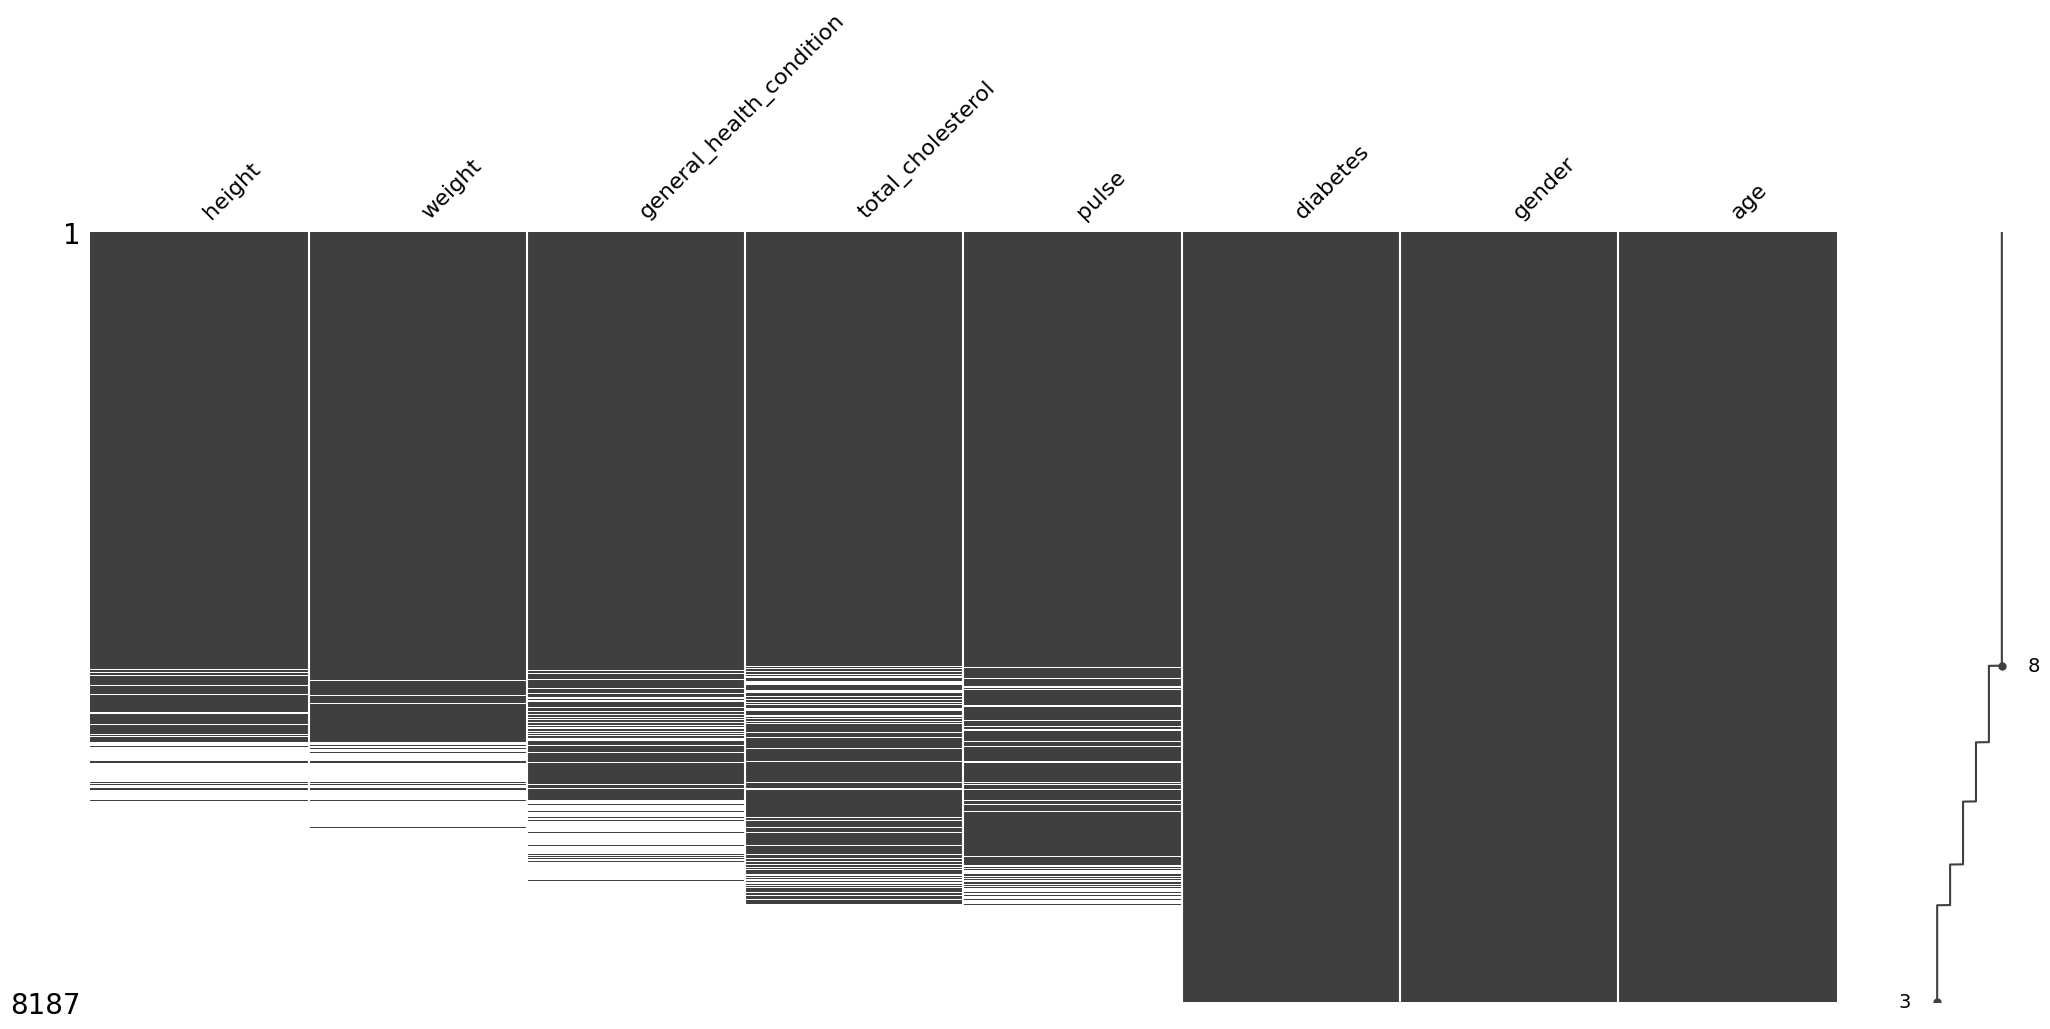

In [34]:
nhanes_df.missing.sort_variables_by_missingness().pipe(
    missingno.matrix, sort="descending"
)

## Eliminar valores faltantes

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>